In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
private_data = pd.read_excel('private_dataM.xlsx')
anon_data = pd.read_csv('anon_data_gaston.csv')
public_results = pd.read_excel('public_data_resultsM.xlsx')
public_register = pd.read_excel('public_data_registerM.xlsx')

In [ ]:
'''
I just copied the same analysis as before but using the anon data, wrote in markdown
the differences in the results, with some plots where relevant.
'''

red = public_results['Red'][:4].sum()
green = public_results['Green'][:4].sum()
e_red = public_results['Red'][4]
e_green = public_results['Green'][4]
total_votes = public_results['Total'][:4].sum()
total_evotes = public_results['Total'][4]

print(f'Booth Results - Red: {red/total_votes*100:.2f}%, Green: {green/total_votes*100:.2f}%')
print(f'Electronic Results - Red: {e_red/total_evotes*100:.2f}%, Green: {e_green/total_evotes*100:.2f}%')

Booth Results - Red: 36.38%, Green: 62.15%
Electronic Results - Red: 33.97%, Green: 62.77%


In [2]:
# For step 3 - question (A)
counts = anon_data.groupby(['party', 'evote']).size().unstack(fill_value=0)
survey_red = counts.loc['Red', 0]
survey_ered = counts.loc['Red', 1]
survey_green = counts.loc['Green', 0]
survey_egreen = counts.loc['Green', 1]

total_e_votes = anon_data['evote'].value_counts()[1]
total_booth_votes = anon_data['evote'].value_counts()[0]

print(f'Survey Booth - Red: {survey_red/total_booth_votes*100:.2f}%, Green: {survey_green/total_booth_votes*100:.2f}%')
print(f'Survey Electronic - Red: {survey_ered/total_e_votes*100:.2f}%, Green: {survey_egreen/total_e_votes*100:.2f}%')

Survey Booth - Red: 35.88%, Green: 64.12%
Survey Electronic - Red: 36.23%, Green: 63.77%


In [4]:
from scipy.stats import chi2_contingency
# same as in the analysis but with anon survey data
vote_df = pd.DataFrame({
    'source': ['survey', 'survey', 'election', 'election', 'survey','survey', 'election', 'election'],
    'party': ['Red', 'Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Green'],
    'evote': [0, 1, 0, 1, 0, 1, 0, 1],
    'votes': [survey_red, survey_ered, red, e_red, survey_green, survey_egreen,  green, e_green]
})
# normalize votes
vote_df['votes_norm'] = (
    vote_df.groupby(['source', 'evote'])['votes']
    .transform(lambda x: x / x.sum() * 1000)  # scale each group to 1000
)

for evote_type in vote_df['evote'].unique():
    subset = vote_df[vote_df['evote'] == evote_type]
    contingency = pd.pivot_table(subset, values='votes_norm', index='source', columns='party')

    print(f"\nVote type: {'Electronic' if evote_type == 1 else 'Booth'}")
    print("Normalized contingency table:")
    print(contingency.round(2), "\n")

    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
    if p < 0.05:
        print("→ Significant difference between anon and election proportions")
    else:
        print("→ No significant difference in proportions")


Vote type: Booth
Normalized contingency table:
party      Green     Red
source                  
election  630.79  369.21
survey    641.22  358.78 

Chi2 = 0.19, p = 0.6612
→ No significant difference in proportions

Vote type: Electronic
Normalized contingency table:
party      Green     Red
source                  
election  648.88  351.12
survey    637.68  362.32 

Chi2 = 0.23, p = 0.6341
→ No significant difference in proportions


Chi2 test results are higher than in the initial analysis, 0.19-0.23 compared to 0.0-0.01, but not enough to establish a significant difference, since p = 63-66%

In [ ]:
# for step 3 - question (B)

for col in ['sex', 'zip', 'education', 'citizenship', 'marital_status', 'age_band']:
    contingency = pd.crosstab(anon_data['party'], anon_data[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f'{col}: p = {p:.4f}')
    if p < 0.05:
        print(f'There is a significant association between party and {col}.')
    else:
        print(f'No significant association between party and {col}.')

sex: p = 0.1656
No significant association between party and sex.
zip: p = 0.8134
No significant association between party and zip.
education: p = 0.0677
No significant association between party and education.
citizenship: p = 0.4111
No significant association between party and citizenship.
marital_status: p = 0.0294
There is a significant association between party and marital_status.
age_band: p = 0.0380
There is a significant association between party and age_band.


There is no significant association between party and gender, which there was in the original data. 

Zip, education and citizenship results are similarly negative.

Marital status and age results are similarly positive.


In [ ]:
# sns.countplot(x='sex', hue='party', data=anon_data)
# plt.show()

counts = private_data.groupby(['party', 'sex']).size().unstack(fill_value=0)
redF = counts.loc['Red', 'Female']
redM = counts.loc['Red', 'Male']
greenF = counts.loc['Green', 'Female']
greenM = counts.loc['Green', 'Male']
total_F = private_data['sex'].value_counts()[0]
total_M = private_data['sex'].value_counts()[1]
print("ORIGINAL DATA")
print(f'Female - Red: {redF/total_F*100:.2f}%, Female - Green: {greenF/total_F*100:.2f}%')
print(f'Male - Red: {redM/total_M*100:.2f}%, Male - Green: {greenM/total_M*100:.2f}%')

counts = anon_data.groupby(['party', 'sex']).size().unstack(fill_value=0)
redF = counts.loc['Red', 'Female']
redM = counts.loc['Red', 'Male']
greenF = counts.loc['Green', 'Female']
greenM = counts.loc['Green', 'Male']
total_F = private_data['sex'].value_counts()[0]
total_M = private_data['sex'].value_counts()[1]
print("\nANONYMIZED DATA")
print(f'Female - Red: {redF/total_F*100:.2f}%, Female - Green: {greenF/total_F*100:.2f}%')
print(f'Male - Red: {redM/total_M*100:.2f}%, Male - Green: {greenM/total_M*100:.2f}%')

ORIGINAL DATA
Female - Red: 46.67%, Female - Green: 52.38%
Male - Red: 24.21%, Male - Green: 74.74%

ANONYMIZED DATA
Female - Red: 40.95%, Female - Green: 59.05%
Male - Red: 30.53%, Male - Green: 69.47%


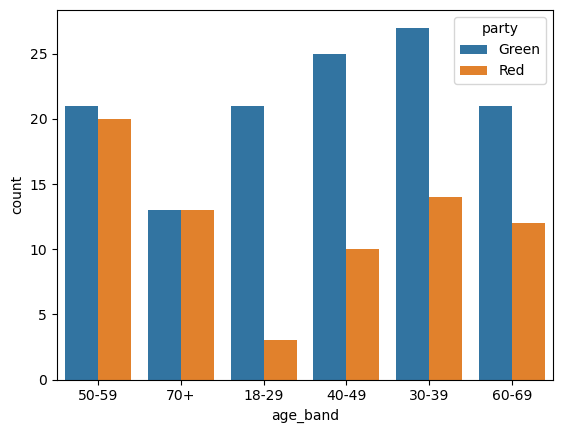

In [16]:
sns.countplot(x='age_band', hue='party', data=anon_data)
plt.show()

age association is still there, harder to visualize because of the bands now, but similar results, green party tends younger, with more balanced results the higher the age band.

In [17]:
# for step 3 - question (C)

for col in ['sex', 'zip', 'education', 'citizenship', 'marital_status', 'age_band']:
    contingency = pd.crosstab(anon_data['evote'], anon_data[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f'{col}: p = {p:.4f}')
    if p < 0.05:
        print(f'There is a significant association between voting method and {col}.')
    else:
        print(f'No significant association between voting method and {col}.')

sex: p = 0.6074
No significant association between voting method and sex.
zip: p = 0.1094
No significant association between voting method and zip.
education: p = 0.0235
There is a significant association between voting method and education.
citizenship: p = 0.0965
No significant association between voting method and citizenship.
marital_status: p = 0.0394
There is a significant association between voting method and marital_status.
age_band: p = 0.3033
No significant association between voting method and age_band.


Gender, zip results are unchanged (negative).

Education is now a positive association, although it was quite low (p=0.16) in the original, so maybe not too surprising.

Citizenship remains negative, although it's not quite close to positive (p=0.096).

Marital status result unchanged (positive).

Age (now categorical) has no association now, while it had before

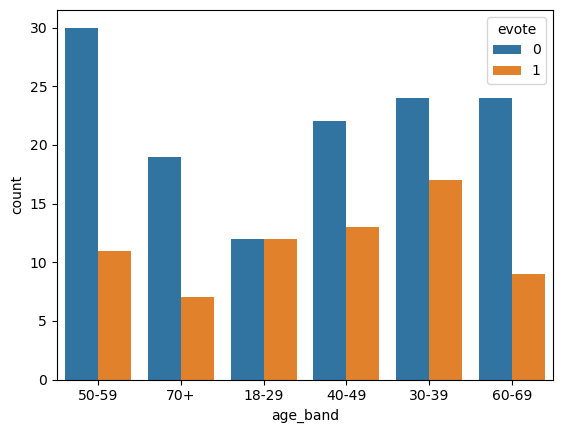

In [18]:
sns.countplot(x='age_band', hue='evote', data=anon_data)
plt.show()

it still feels like younger people are more likely to vote electronic (1) based on the plot, but I guess not enough to be significant, whatever